In [23]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import ma2
from elfi.methods.parameter_inference import ROMC
model = ma2.get_model(seed_obs=seed)

In [29]:
romc = ROMC(model, discrepancy_name="d", left_lim=np.array([-2., -3.]), right_lim =np.array([2., 3.]))

In [77]:
n1 = 1000
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems ###
Time: 59.978 sec████████████████████████████████████████████-| 99.9% Complete


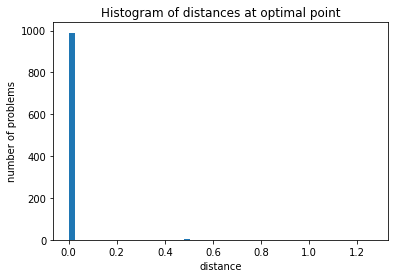

In [78]:
romc.theta_hist()

In [90]:
eps = .3
region_mode = "romc_jacobian"
romc.estimate_regions(eps=eps, region_mode=region_mode)

### Estimating regions ###

Time: 48.403 sec ███████████████████████████████████████████-| 99.9% Complete



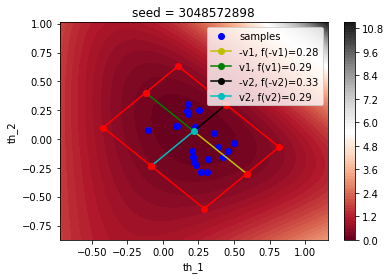

In [91]:
romc.visualize_region(5)

In [92]:
romc.eval_posterior(np.array([[0., 0.]]))

array([[0.91]])

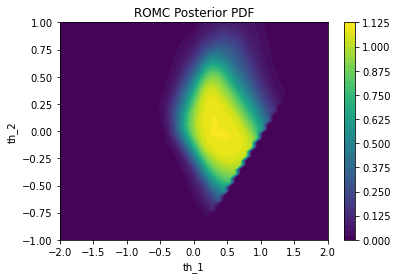

In [93]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(-2, 2, nof_points)
    th2 = np.linspace(-1, 1, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_posterior, nof_points=50)

In [83]:
n2 = 20
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Time: 13.418 sec ███████████████████████████████████████████-| 100.0% Complete



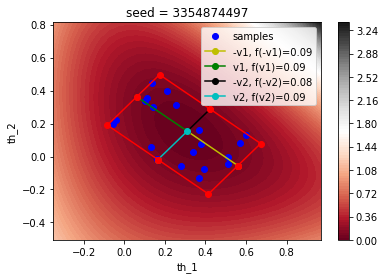

In [84]:
# As before but now it plots the samples as well
romc.visualize_region(1)

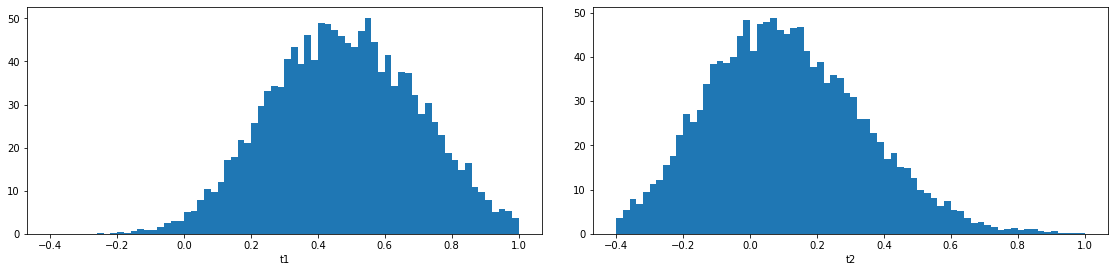

In [86]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

In [89]:
romc.result.sample_means

OrderedDict([('t1', 0.480899009848647), ('t2', 0.1037649750878983)])

In [98]:
model.source_net.edges()

[('t1', 't2'),
 ('t1', 'MA2'),
 ('_t1_c1c8', 't1'),
 ('t2', 'MA2'),
 ('_t2_ecdb', 't2'),
 ('MA2', 'S1'),
 ('MA2', 'S2'),
 ('S1', 'd'),
 ('S2', 'd'),
 ('_S2_008a', 'S2')]